# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [12]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(shuffle=1, verbose=1, pattern=1):
    
    n = 100
    mu_A = np.array([2.0, 1.0])
    mu_B = np.array([-2.0, 0.0])
    sigma_A = 0.5
    sigma_B = 0.5

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

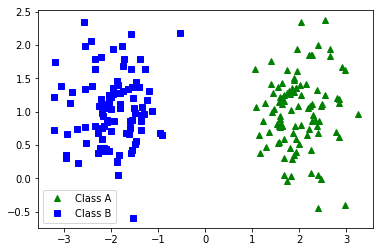

In [13]:
class_A, class_B = generatePattern(shuffle=0,pattern=0)

#### 3.1.2 Classification with a single-layer perceptron and analysis

#### 3.1.2.1

In [14]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W


In [15]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((T-Y)**2))

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err

def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    err = []
    for i in range(len(T)):
        #X1_sample = X[0][i]
        #X2_sample = X[1][i]
        #X3_sample = X[2][i]
        X_sample = X[:,i]
        T_sample = T[i]
        
        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        #H_s.append(H)
        err.append((H-T_sample)**2)
        
        weights = weights+dW
    print(weights)
    err = np.mean(err)
    print(err)
    
    return weights, err

def train_network(eta,X,W,T,epochs,plot=1,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    
    if plot:
        linespace = np.linspace(-2,2,10)
        line_perceptron = get_decisionBound(W_perceptron)
        line_delta_rule = get_decisionBound(W_delta_rule)
        
        plt.subplot(211)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Perceptron Learning Rule')
        
        plt.subplot(212)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Delta Learning Rule')
        
        
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            line_perceptron = get_decisionBound(W_perceptron)
            line_delta_rule = get_decisionBound(W_delta_rule)
    
            #plt_line_perceptron.set_ydata(line_perceptron)
            #plt_line_delta_rule.set_ydata(line_delta_rule)
            
            #plt.ion()
            #plt.draw()
            #plt_line_perceptron.remove()
            #plt_line_delta_rule.remove()
            
            plt.subplot(211)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Perceptron Learning Rule')
        
            plt.subplot(212)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Delta Learning Rule')
            
            plt.show()
            plt.pause(0.1)
    
            #print(linespace.shape,line.shape)
    
        
    
    #plt.show()
            
    return W_perceptron, W_delta_rule, errors


In [16]:
def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    
    return line

In [18]:
def plot_decision_boundary(X,T, W, h = 0.1):
        x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
        y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        print(yy.shape)
        ones = np.ones((1,grid_data.shape[1]))
        grid_data = np.vstack((grid_data,ones))
        print("decision")
        print(grid_data.shape)
        print(ones.shape)
        print(W.shape)
        
        Z = predict(grid_data,W, True)
        #print(Z)
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[0, :], X[1, :],c= T, cmap=clr.ListedColormap(['blue','green']))
        plt.show()

In [20]:
def predict(validation,W, classification = True):
        #print(validation)
        prediction = H = np.matmul(W,validation)
        if classification:
            for p in range(prediction.shape[1]):
                if prediction[0,p] >0:
                    prediction[0,p] = 1
                else:
                    prediction[0,p] = -1
            
        return prediction

(47, 82)
decision
(3, 3854)
(1, 3854)
(1, 3)


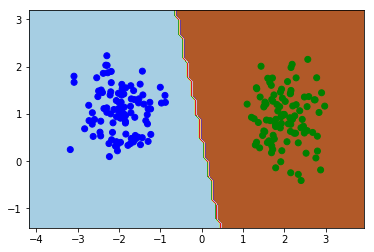

(47, 82)
decision
(3, 3854)
(1, 3854)
(1, 3)


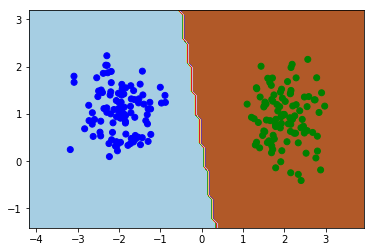

In [21]:
#Perceptron and Delta learning rule

eta = 1e-4
epochs = 5
n_outputs = 1
n_dim = 3
scale = 1

X, T = generatePattern(verbose=0,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs,0,True)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs,0)
#W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
#plt_decisionBound(W_perceptron)
#plt_decisionBound(W_delta_rule)

plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)

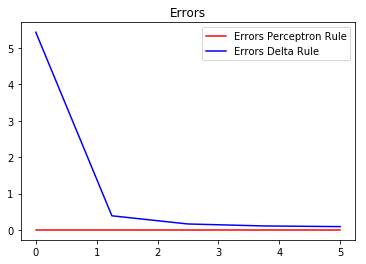

In [8]:
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
plt.legend(handles=[plt_errs_perceptron, plt_errs_delta_rule])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

#print(errors)

#### 3.1.2.1 Plots

In [9]:
#Perceptron and Delta learning rule Assignment 3.1.2.1 & 2

eta = np.array([0.5,0.75,1,1.25,1.5])*1e-3

epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2

X, T = generatePattern(verbose=0,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

var1, var2, errors_s1 = train_network(eta[0],X,W,T,epochs,0,True)
var3, var4, errors_b1 = train_network(eta[0],X,W,T,epochs,0)

var1, var2, errors_s2 = train_network(eta[1],X,W,T,epochs,0,True)
var3, var4, errors_b2 = train_network(eta[1],X,W,T,epochs,0)

var1, var2, errors_s3 = train_network(eta[2],X,W,T,epochs,0,True)
var3, var4, errors_b3 = train_network(eta[2],X,W,T,epochs,0)

var1, var2, errors_s4 = train_network(eta[3],X,W,T,epochs,0,True)
var3, var4, errors_b4 = train_network(eta[3],X,W,T,epochs,0)

var1, var2, errors_s5 = train_network(eta[4],X,W,T,epochs,0,True)
var3, var4, errors_b5 = train_network(eta[4],X,W,T,epochs,0)


[ 2.00860417e-01 -5.72901526e-03  1.35360007e-05]
1.0248994884832439
[ 0.11711229 -0.00291499  0.00046671]
0.3857229051053847
[ 0.06828706 -0.00136617  0.00064485]
0.1684675063434327
[ 0.03982096 -0.00053636  0.00067993]
0.0946091827749437
[ 0.02322389 -0.00011089  0.00064539]
0.0694916325342922
[1.35464183e-02 9.06793440e-05 5.81278478e-04]
0.06094419596680734
[0.00790316 0.00017117 0.00050872]
0.05803197253195636
[0.00461201 0.0001886  0.00043825]
0.057037444642344365
[0.0026923  0.00017528 0.0003746 ]
0.056696320271849975
[0.00157231 0.00014885 0.00031941]
0.05657833617053999
[0.00091868 0.00011859 0.00027272]
0.0565368808171271
[5.37081729e-04 8.91670802e-05 2.33839382e-04]
0.05652187907708232
[3.14170337e-04 6.26693048e-05 2.01795351e-04]
0.05651615308412241
[1.83861461e-04 3.98254227e-05 1.75556646e-04]
0.05651376270442299
[1.07610001e-04 2.06662545e-05 1.54157304e-04]
0.056512623874913126
[6.29310350e-05 4.89561277e-06 1.36741726e-04]
0.05651198663092119
[ 3.67049400e-05 -7.9099

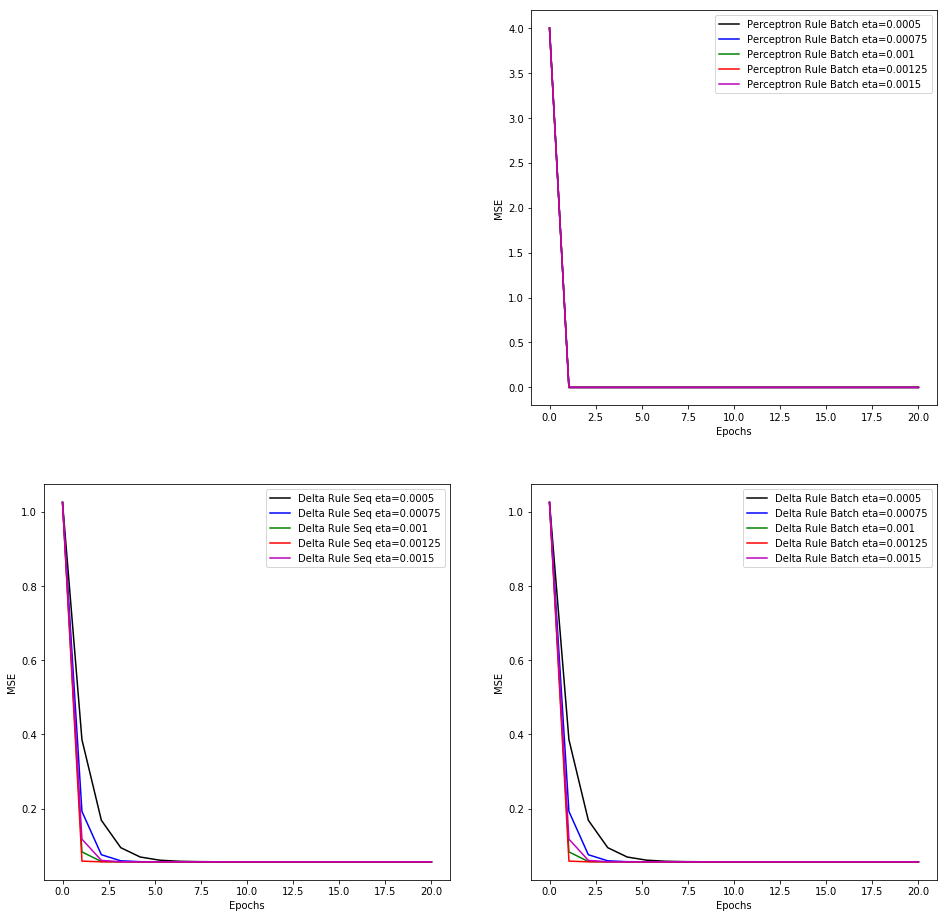

In [10]:
fig  = plt.figure(figsize=(16,16))
'''
ax1 = fig.add_subplot(221)
plt_errs_perceptron_s1, = ax1.plot(np.linspace(0,epochs,epochs),errors_s1[0][:],'k', label='Perceptron Rule Seq ' + str(eta[0]))
plt_errs_perceptron_s2, = ax1.plot(np.linspace(0,epochs,epochs),errors_s2[0][:],'b', label='Perceptron Rule Seq ' + str(eta[1]))
plt_errs_perceptron_s3, = ax1.plot(np.linspace(0,epochs,epochs),errors_s3[0][:],'g', label='Perceptron Rule Seq ' + str(eta[2]))
plt_errs_perceptron_s4, = ax1.plot(np.linspace(0,epochs,epochs),errors_s4[0][:],'r', label='Perceptron Rule Seq ' + str(eta[3]))
plt_errs_perceptron_s5, = ax1.plot(np.linspace(0,epochs,epochs),errors_s5[0][:],'m', label='Perceptron Rule Seq ' + str(eta[4]))
plt.legend()
'''
                                   
ax2 = fig.add_subplot(222)
plt_errs_perceptron_b1, = ax2.plot(np.linspace(0,epochs,epochs),errors_b1[0][:],'k', label='Perceptron Rule Batch eta=' + str(eta[0]))
plt_errs_perceptron_b2, = ax2.plot(np.linspace(0,epochs,epochs),errors_b2[0][:],'b', label='Perceptron Rule Batch eta=' + str(eta[1]))
plt_errs_perceptron_b3, = ax2.plot(np.linspace(0,epochs,epochs),errors_b3[0][:],'g', label='Perceptron Rule Batch eta=' + str(eta[2]))
plt_errs_perceptron_b4, = ax2.plot(np.linspace(0,epochs,epochs),errors_b4[0][:],'r', label='Perceptron Rule Batch eta=' + str(eta[3]))
plt_errs_perceptron_b5, = ax2.plot(np.linspace(0,epochs,epochs),errors_b5[0][:],'m', label='Perceptron Rule Batch eta=' + str(eta[4]))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
                                   
ax3 = fig.add_subplot(223)
plt_errs_delta_rule_s1, = ax3.plot(np.linspace(0,epochs,epochs),errors_s1[1][:],'k', label='Delta Rule Seq eta=' + str(eta[0]))
plt_errs_delta_rule_s2, = ax3.plot(np.linspace(0,epochs,epochs),errors_s2[1][:],'b', label='Delta Rule Seq eta=' + str(eta[1]))
plt_errs_delta_rule_s3, = ax3.plot(np.linspace(0,epochs,epochs),errors_s3[1][:],'g', label='Delta Rule Seq eta=' + str(eta[2]))
plt_errs_delta_rule_s4, = ax3.plot(np.linspace(0,epochs,epochs),errors_s4[1][:],'r', label='Delta Rule Seq eta=' + str(eta[3]))
plt_errs_delta_rule_s5, = ax3.plot(np.linspace(0,epochs,epochs),errors_s5[1][:],'m', label='Delta Rule Seq eta=' + str(eta[4]))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
                                   
ax4 = fig.add_subplot(224)
plt_errs_delta_rule_b1, = ax4.plot(np.linspace(0,epochs,epochs),errors_b1[1][:],'k', label='Delta Rule Batch eta=' + str(eta[0]))
plt_errs_delta_rule_b2, = ax4.plot(np.linspace(0,epochs,epochs),errors_b2[1][:],'b', label='Delta Rule Batch eta=' + str(eta[1]))
plt_errs_delta_rule_b3, = ax4.plot(np.linspace(0,epochs,epochs),errors_b3[1][:],'g', label='Delta Rule Batch eta=' + str(eta[2]))
plt_errs_delta_rule_b4, = ax4.plot(np.linspace(0,epochs,epochs),errors_b4[1][:],'r', label='Delta Rule Batch eta=' + str(eta[3]))
plt_errs_delta_rule_b5, = ax4.plot(np.linspace(0,epochs,epochs),errors_b5[1][:],'m', label='Delta Rule Batch eta=' + str(eta[4]))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()                                   

plt.show()

    